## Setup

In [1]:
from modules.quicklook.src.analyze_time_series import AnalyzeTimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import time
import subprocess
import matplotlib.dates as mdates
from datetime import datetime
from astropy.table import Table
%matplotlib inline

import sqlite3

In [2]:
# files stored locally at /data/user/jspencermorris/testdata
db_path = '/testdata/kpf_ts_oct2024_v2.db' # name of database file
myTS = AnalyzeTimeSeries(db_path=db_path) # build database

# import the test timeseries database
myTS = AnalyzeTimeSeries(db_path=db_path)

INFO: Starting AnalyzeTimeSeries
INFO: Jupyter Notebook environment detected.
INFO: Path of database file: /testdata/kpf_ts_oct2024_v2.db
INFO: Base data directory: /data/L0
INFO: Primary table 'kpfdb' created/updated successfully.
INFO: Metadata table 'kpfdb_metadata' created/updated successfully.
INFO: Summary: 14928 obs x 1188 cols over 28 days in 1013KP.2-20241027; updated 2025-02-06 18:56:34
INFO: Starting AnalyzeTimeSeries
INFO: Jupyter Notebook environment detected.
INFO: Path of database file: /testdata/kpf_ts_oct2024_v2.db
INFO: Base data directory: /data/L0
INFO: Primary table 'kpfdb' created/updated successfully.
INFO: Metadata table 'kpfdb_metadata' created/updated successfully.
INFO: Summary: 14928 obs x 1188 cols over 28 days in 1013KP.2-20241027; updated 2025-02-06 18:56:34


## Define Helper Functions

In [3]:
# define a simple function to run a query and return the results as a dataframe
def jsm_kpf_query(jsm_query):
    conn = sqlite3.connect(myTS.db_path)
    cursor = conn.cursor()
    query = jsm_query
    results_df = pd.read_sql_query(query, conn)
    conn.close()
    
    return results_df 

In [ ]:
# define a function to plot the distributions of radial velocity errors
def plot_rv_error_histograms_by_fiber(df):

    plt.figure(figsize=(10, 6))

    plt.hist(df['CCD1ERV1'].dropna(), bins=100, alpha=0.5, label='CCD1ERV1', color='purple', density=True)
    plt.hist(df['CCD1ERV2'].dropna(), bins=100, alpha=0.5, label='CCD1ERV2', color='green', density=True)
    plt.hist(df['CCD1ERV3'].dropna(), bins=100, alpha=0.5, label='CCD1ERV3', color='red', density=True)
    plt.hist(df['CCD1ERV'].dropna(), bins=100, alpha=0.5, label='CCD1ERV', color='black', density=True)

    plt.xlabel('RV Error (km/s)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Radial Velocity Errors')
    plt.legend()
    plt.grid(True)
    plt.show()


In [83]:
# define a function to Scatter plot to explore the correlation between CCD1RV and its error CCD1ERV
def plot_rv_error_scatter_by_fiber(df, xmin, xmax, ymin, ymax):

    plt.figure(figsize=(10, 6))
    plt.scatter(df['CCD1RV'], df['CCD1ERV'], color='black', label='CCD1ER', alpha=0.5)
    plt.scatter(df['CCD1RV1'], df['CCD1ERV1'], color='purple', label='CCD1ER1', alpha=0.5)
    plt.scatter(df['CCD1RV2'], df['CCD1ERV2'], color='green', label='CCD1ER2', alpha=0.5)
    plt.scatter(df['CCD1RV3'], df['CCD1ERV3'], color='red', label='CCD1ER3', alpha=0.5)

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    plt.xlabel('RV (km/s)')
    plt.ylabel('Error in RV (km/s)')
    plt.title('Correlation Between CCD1 Radial Velocity and Its Error')
    plt.legend()
    plt.grid(True)
    plt.show()


In [39]:
# define a function to plot the mean RV value, along with its error, from the Green CCD over time

def plot_rv_time_trends_grid(df, xmin, xmax, ymin, ymax):
    
    # make figure and axes grid
    fig, axs = plt.subplots(3, 3, figsize=(15, 9))  # 3 rows, 2 columns
    axs = axs.flatten()  # flatten the 2d array of axes to simplify indexing

    # plot at (0, 0)
    axs[0].plot(df['day_num'], df['CCD1RV'], label='CCD1RV', color='black', linewidth=4)
    axs[0].plot(df['day_num'], df['CCD1RV1'], label='CCD1RV1', color='purple')
    axs[0].plot(df['day_num'], df['CCD1RV2'], label='CCD1RV2', color='green')
    axs[0].plot(df['day_num'], df['CCD1RV3'], label='CCD1RV3', color='red')
    axs[0].set_xlabel('Day Number')
    axs[0].set_ylabel('Radial Velocity (km/s)')
    axs[0].set_title('CCD1 Radial Velocities Over Time')
    axs[0].legend()
    axs[0].grid(True)

    # plot at (0, 1)
    axs[1].plot(df['day_num'], df['CCD1RV'], label='CCD1RV', color='black', linewidth=4)
    axs[1].plot(df['day_num'], df['CCD1RV1'], label='CCD1RV1', color='purple')
    axs[1].plot(df['day_num'], df['CCD1RV2'], label='CCD1RV2', color='green')
    axs[1].plot(df['day_num'], df['CCD1RV3'], label='CCD1RV3', color='red')
    axs[1].set_xlim(0, 4)
    axs[1].set_ylim(-150, 150)
    axs[1].set_xlabel('Day Number')
    axs[1].set_ylabel('Radial Velocity (km/s)')
    axs[1].set_title('CCD1 Radial Velocities Over Time')
    axs[1].legend()
    axs[1].grid(True)

    # plot at (0, 2)
    axs[2].plot(df['day_num'], df['CCD1RV'], label='CCD1RV', color='black', linewidth=4)
    axs[2].plot(df['day_num'], df['CCD1RV1'], label='CCD1RV1', color='purple')
    axs[2].plot(df['day_num'], df['CCD1RV2'], label='CCD1RV2', color='green')
    axs[2].plot(df['day_num'], df['CCD1RV3'], label='CCD1RV3', color='red')
    axs[2].set_xlim(xmin, xmax)
    axs[2].set_ylim(ymin, ymax)
    axs[2].set_xlabel('Day Number')
    axs[2].set_ylabel('Radial Velocity (km/s)')
    axs[2].set_title('CCD1 Radial Velocities Over Time')
    axs[2].legend()
    axs[2].grid(True)
    
    # compute the upper and lower bounds for the error region
    df['CCD1RV_upper'] = df['CCD1RV'] + df['CCD1ERV']
    df['CCD1RV_lower'] = df['CCD1RV'] - df['CCD1ERV']

    # plot at (1,0)
    axs[3].plot(df['day_num'], df['CCD1RV'], label='CCD1RV', color='black')
    axs[3].fill_between(df['day_num'], df['CCD1RV_lower'], df['CCD1RV_upper'], color='black', alpha=0.3, label='Error (CCD1ERV)')
    axs[3].set_xlabel('Day Number')
    axs[3].set_ylabel('CCD1RV Value')
    axs[3].set_title('CCD1RV Over Time with Error Shading')
    axs[3].legend()
    axs[3].grid(True)
    
    # plot at (1,1)
    axs[4].plot(df['day_num'], df['CCD1RV'], label='CCD1RV', color='black')
    axs[4].fill_between(df['day_num'], df['CCD1RV_lower'], df['CCD1RV_upper'], color='black', alpha=0.3, label='Error (CCD1ERV)')
    axs[4].set_xlim(0, 4)
    axs[4].set_ylim(-150, 150)
    axs[4].set_xlabel('Day Number')
    axs[4].set_ylabel('CCD1RV Value')
    axs[4].set_title('CCD1RV Over Time with Error Shading')
    axs[4].legend()
    axs[4].grid(True)

    # plot at (1,2)
    axs[5].plot(df['day_num'], df['CCD1RV'], label='CCD1RV', color='black')
    axs[5].fill_between(df['day_num'], df['CCD1RV_lower'], df['CCD1RV_upper'], color='black', alpha=0.3, label='Error (CCD1ERV)')
    axs[5].set_xlim(xmin, xmax)
    axs[5].set_ylim(ymin, ymax)
    axs[5].set_xlabel('Day Number')
    axs[5].set_ylabel('CCD1RV Value')
    axs[5].set_title('CCD1RV Over Time with Error Shading')
    axs[5].legend()
    axs[5].grid(True)

    # plot at (2,0)
    axs[6].plot(df['day_num'], df['CCD1ERV'], label='CCD1ERV', color='black', linewidth=4)
    axs[6].plot(df['day_num'], df['CCD1ERV1'], label='CCD1ERV1', color='purple')
    axs[6].plot(df['day_num'], df['CCD1ERV2'], label='CCD1ERV2', color='green')
    axs[6].plot(df['day_num'], df['CCD1ERV3'], label='CCD1ERV3', color='red')
    axs[6].set_xlabel('Day Number')
    axs[6].set_ylabel('Error in Radial Velocity (km/s)')
    axs[6].set_title('CCD1 Radial Velocity Errors Over Time')
    axs[6].legend()
    axs[6].grid(True)

    # plot at (2,1)
    axs[7].plot(df['day_num'], df['CCD1ERV'], label='CCD1ERV', color='black', linewidth=4)
    axs[7].plot(df['day_num'], df['CCD1ERV1'], label='CCD1ERV1', color='purple')
    axs[7].plot(df['day_num'], df['CCD1ERV2'], label='CCD1ERV2', color='green')
    axs[7].plot(df['day_num'], df['CCD1ERV3'], label='CCD1ERV3', color='red')
    axs[7].set_xlim(0, 4)
    axs[7].set_xlabel('Day Number')
    axs[7].set_ylabel('Error in Radial Velocity (km/s)')
    axs[7].set_title('CCD1 Radial Velocity Errors Over Time')
    axs[7].legend()
    axs[7].grid(True)

    # plot at (2,2)
    axs[8].plot(df['day_num'], df['CCD1ERV'], label='CCD1ERV', color='black', linewidth=4)
    axs[8].plot(df['day_num'], df['CCD1ERV1'], label='CCD1ERV1', color='purple')
    axs[8].plot(df['day_num'], df['CCD1ERV2'], label='CCD1ERV2', color='green')
    axs[8].plot(df['day_num'], df['CCD1ERV3'], label='CCD1ERV3', color='red')
    axs[8].set_xlim(xmin, xmax)
    axs[8].set_xlabel('Day Number')
    axs[8].set_ylabel('Error in Radial Velocity (km/s)')
    axs[8].set_title('CCD1 Radial Velocity Errors Over Time')
    axs[8].legend()
    axs[8].grid(True)


    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()


In [ ]:
# define a function to plot the mean RV against the component RV's
def plot_rv_scatter_by_fiber(df, x_min=-100, x_max=100, y_min=-200, y_max=200):
    
    # make figure and axes grid
    fig, axs = plt.subplots(3, 2, figsize=(10,9))  # 1 row, 3 columns
    axs = axs.flatten()  # flatten the 2d array of axes to simplify indexing
    
    # plot at (0,0)
    axs[0].scatter(df['CCD1RV'], df['CCD1RV1'], label='CCD1RV1', color='purple', alpha=0.5)
    # compute extrema for computing line
    min_val = min(df['CCD1RV'].min(), df['CCD1RV1'].min())
    max_val = max(df['CCD1RV'].max(), df['CCD1RV1'].max())
    axs[0].set_xlabel('CCD1RV Radial Velocity (km/s)')
    axs[0].set_ylabel('CCD1RV1 Radial Velocity (km/s)')
    axs[0].set_title(f"Comparison of Mean and Fiber 1 RV's")
    axs[0].grid(True)
    axs[0].legend()

    # plot at (0,1)
    axs[1].scatter(df['CCD1RV'], df['CCD1RV1'], label='CCD1RV1', color='purple', alpha=0.5)
    # compute extrema for computing line
    min_val = min(df['CCD1RV'].min(), df['CCD1RV1'].min())
    max_val = max(df['CCD1RV'].max(), df['CCD1RV1'].max())
    axs[1].plot([min_val, max_val], [min_val, max_val], color="black", linewidth=1, label='y=x') # draw diagonal line y=x
    axs[1].set_xlim(x_min, x_max)
    axs[1].set_ylim(y_min, y_max)
    axs[1].set_xlabel('CCD1RV Radial Velocity (km/s)')
    axs[1].set_ylabel('CCD1RV1 Radial Velocity (km/s)')
    axs[1].set_title(f"Comparison of Mean and Fiber 1 RV's")
    axs[1].grid(True)
    axs[1].legend()

    # plot at (1,0)
    axs[2].scatter(df['CCD1RV'], df['CCD1RV2'], label='CCD1RV2', color='green', alpha=0.5)
    # compute extrema for computing line
    min_val = min(df['CCD1RV'].min(), df['CCD1RV2'].min())
    max_val = max(df['CCD1RV'].max(), df['CCD1RV2'].max())
    axs[2].set_xlabel('CCD1RV Radial Velocity (km/s)')
    axs[2].set_ylabel('CCD1RV2 Radial Velocity (km/s)')
    axs[2].set_title(f"Comparison of Mean and Fiber 2 RV's")
    axs[2].grid(True)
    axs[2].legend()

    # plot at (1,1)
    axs[3].scatter(df['CCD1RV'], df['CCD1RV1'], label='CCD1RV2', color='green', alpha=0.5)
    # compute extrema for computing line
    min_val = min(df['CCD1RV'].min(), df['CCD1RV2'].min())
    max_val = max(df['CCD1RV'].max(), df['CCD1RV2'].max())
    axs[3].plot([min_val, max_val], [min_val, max_val], color="black", linewidth=1, label='y=x') # draw diagonal line y=x
    axs[3].set_xlim(x_min, x_max)
    axs[3].set_ylim(y_min, y_max)
    axs[3].set_xlabel('CCD1RV Radial Velocity (km/s)')
    axs[3].set_ylabel('CCD1RV2 Radial Velocity (km/s)')
    axs[3].set_title(f"Comparison of Mean and Fiber 2 RV's")
    axs[3].grid(True)
    axs[3].legend()
    
    # plot at (2,0)
    axs[4].scatter(df['CCD1RV'], df['CCD1RV3'], label='CCD1RV3', color='red', alpha=0.5)
    # compute extrema for computing line
    min_val = min(df['CCD1RV'].min(), df['CCD1RV3'].min())
    max_val = max(df['CCD1RV'].max(), df['CCD1RV3'].max())
    axs[4].set_xlabel('CCD1RV Radial Velocity (km/s)')
    axs[4].set_ylabel('CCD1RV3 Radial Velocity (km/s)')
    axs[4].set_title(f"Comparison of Mean and Fiber 3 RV's")
    axs[4].grid(True)
    axs[4].legend()

    # plot at (2,1)
    axs[5].scatter(df['CCD1RV'], df['CCD1RV3'], label='CCD1RV3', color='red', alpha=0.5)
    # compute extrema for computing line
    min_val = min(df['CCD1RV'].min(), df['CCD1RV3'].min())
    max_val = max(df['CCD1RV'].max(), df['CCD1RV3'].max())
    axs[5].plot([min_val, max_val], [min_val, max_val], color="black", linewidth=1, label='y=x') # draw diagonal line y=x
    axs[5].set_xlim(x_min, x_max)
    axs[5].set_ylim(y_min, y_max)
    axs[5].set_xlabel('CCD1RV Radial Velocity (km/s)')
    axs[5].set_ylabel('CCD1RV3 Radial Velocity (km/s)')
    axs[5].set_title(f"Comparison of Mean and Fiber 3 RV's")
    axs[5].grid(True)
    axs[5].legend()
    
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()
    
    

In [59]:
# define a function to plot an overlay of the mean RV against the component RV's
def plot_rv_scatter_by_fiber_overlay(df, x_min=-100, x_max=100, y_min=-200, y_max=200):
    fig, axs = plt.subplots(1, 2, figsize=(10, 6))  # 1 row, 2 columns
    
    # define the colors for the plots
    colors = ['purple', 'green', 'red']
    labels = ['Fiber 1', 'Fiber 2', 'Fiber 3']

    # first subplot without y=x lines
    for i, color in enumerate(colors):
        axs[0].scatter(df['CCD1RV'], df[f'CCD1RV{i+1}'], label=f'CCD1RV{i+1}', color=color, alpha=0.8)
        axs[0].set_xlabel('CCD1RV Radial Velocity (km/s)')
        axs[0].set_ylabel(f'CCD1RV(n) )Radial Velocity (km/s)')
    axs[0].set_title('Comparison of Mean RV and Component RVs')
    axs[0].grid(True)
    axs[0].legend(title="Components")

    # second subplot with y=x lines
    for i, color in enumerate(colors):
        axs[1].scatter(df['CCD1RV'], df[f'CCD1RV{i+1}'], label=f'CCD1RV{i+1}', color=color, alpha=0.8)
        min_val = min(df['CCD1RV'].min(), df[f'CCD1RV{i+1}'].min())
        max_val = max(df['CCD1RV'].max(), df[f'CCD1RV{i+1}'].max())
        axs[1].plot([min_val, max_val], [min_val, max_val], color=color, linewidth=1, label=f'y=x for {labels[i]}')
        axs[1].set_xlim(x_min, x_max)
        axs[1].set_ylim(y_min, y_max)
        axs[1].set_xlabel('CCD1RV Radial Velocity (km/s)')
        axs[1].set_ylabel(f'CCD1RV(n) Radial Velocity (km/s)')
    axs[1].set_title('Comparison of Mean RV and Component RVs with Identity Lines')
    axs[1].grid(True)
    axs[1].legend(title="Components & Lines")

    plt.tight_layout()
    plt.show()

## EDA - L2

In [ ]:
# define a query to return the highest level (data products (L2) for final RV's
query = """
SELECT ObsID, OBJECT, datecode, CCFRV, CCFERV, CCFBJD
FROM kpfdb
ORDER BY ObsID
"""

# return the results in a df
df_01 = jsm_kpf_query(query)

# inspect the df
display(df_01.head())

,ObsID,OBJECT,datecode,CCFRV,CCFERV,CCFBJD
0,KP.20241001.00018.07,autocal-flat-all,20241001,99.511850,0.094723,2.460585e+06
1,KP.20241001.00076.69,autocal-flat-all,20241001,99.638150,0.095666,2.460585e+06
2,KP.20241001.00134.98,autocal-flat-all,20241001,99.746238,0.099197,2.460585e+06
3,KP.20241001.00193.33,autocal-flat-all,20241001,99.098023,0.097360,2.460585e+06
4,KP.20241001.00251.84,autocal-flat-all,20241001,98.524661,0.066809,2.460585e+06


## EDA - CCD1

For now, concentrate work on CCD1, the green detector

questions
* when we say green ccd, does that simply mean there's a green filter somewhere in the optical path?
* and is there a schematic diagram of the optics?

In [65]:
# define a query to return fields relevant for analysis of L2 CCD1 data products and their upstream features
query = """
SELECT 
    ObsID, OBJECT, datecode, CCD1BJD,
    CCFRV, CCFERV,
    CCD1RV, CCD1ERV,
    CCD1RV1, CCD1ERV1, CCD1RV2, CCD1ERV2, CCD1RV3, CCD1ERV3,
    ELAPSED, FRAMENO, PROGNAME, HA, EL, AZ, AIRMASS,
    GREEN, FFFB, EXPMETER, "CAL-OBJ", "SKY-OBJ", "SCI-OBJ",
    ETAV1C1T, ETAV1C2T, ETAV1C3T, ETAV1C4T, ETAV2C3T
FROM kpfdb
ORDER BY ObsID
"""

# return the results in a df
df_02 = jsm_kpf_query(query)

# create new feature for the day number
df_02['day_num'] = df_02['CCD1BJD'] - df_02['CCD1BJD'].iloc[0] # create a new column for day number of the month
position = df_02.columns.get_loc('CCD1BJD') + 1  # find the position of 'CCD1BJD' and add one
df_02.insert(position, 'day_num', df_02.pop('day_num'))  # insert 'day_num' at the correct position

In [66]:
# define a query to return the highest level (data products (L2) for final RV's as well as Green CCD RV's
df_02a = df_02[["ObsID", "OBJECT", "datecode", "CCD1BJD", "day_num", "CCFRV", "CCFERV", "CCD1RV1", "CCD1ERV1", "CCD1RV2", "CCD1ERV2", "CCD1RV3", "CCD1ERV3", "CCD1RV", "CCD1ERV"]]

# inspect the df
display(df_02a.head())

# display the df structure
print("DataFrame Information:")
display(df_02a.info())

# inspect summary stats
print("\nSummary Statistics:")
display(df_02a.describe())

# inspect the different objects included
print(df_02a['OBJECT'].unique())

,ObsID,OBJECT,datecode,CCD1BJD,day_num,CCFRV,CCFERV,CCD1RV1,CCD1ERV1,CCD1RV2,CCD1ERV2,CCD1RV3,CCD1ERV3,CCD1RV,CCD1ERV
0,KP.20241001.00018.07,autocal-flat-all,20241001,2.460585e+06,0.000000,99.511850,0.094723,99.596397,0.165004,99.582283,0.161572,99.570768,0.160154,99.588124,0.106252
1,KP.20241001.00076.69,autocal-flat-all,20241001,2.460585e+06,0.000678,99.638150,0.095666,98.356045,0.067148,98.991361,0.146072,99.783053,0.168876,99.688980,0.106544
2,KP.20241001.00134.98,autocal-flat-all,20241001,2.460585e+06,0.001353,99.746238,0.099197,99.115111,0.188323,98.066629,0.161624,99.705058,0.156691,99.729656,0.108858
3,KP.20241001.00193.33,autocal-flat-all,20241001,2.460585e+06,0.002029,99.098023,0.097360,98.958977,0.154265,99.093026,0.163043,99.280551,0.169930,99.088525,0.112403
4,KP.20241001.00251.84,autocal-flat-all,20241001,2.460585e+06,0.002705,98.524661,0.066809,98.665047,0.173642,99.577944,0.158185,99.228884,0.164925,99.148885,0.114509


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14928 entries, 0 to 14927
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ObsID     14928 non-null  object 
 1   OBJECT    14928 non-null  object 
 2   datecode  14928 non-null  object 
 3   CCD1BJD   13403 non-null  float64
 4   day_num   13403 non-null  float64
 5   CCFRV     13404 non-null  float64
 6   CCFERV    13404 non-null  float64
 7   CCD1RV1   13403 non-null  float64
 8   CCD1ERV1  13403 non-null  float64
 9   CCD1RV2   13403 non-null  float64
 10  CCD1ERV2  13403 non-null  float64
 11  CCD1RV3   13403 non-null  float64
 12  CCD1ERV3  13403 non-null  float64
 13  CCD1RV    13403 non-null  float64
 14  CCD1ERV   13403 non-null  float64
dtypes: float64(12), object(3)
memory usage: 1.7+ MB


None


Summary Statistics:


,CCD1BJD,day_num,CCFRV,CCFERV,CCD1RV1,CCD1ERV1,CCD1RV2,CCD1ERV2,CCD1RV3,CCD1ERV3,CCD1RV,CCD1ERV
count,1.340300e+04,13403.000000,13404.000000,13404.000000,13403.000000,13403.000000,13403.000000,13403.000000,13403.000000,13403.000000,13403.000000,13403.000000
mean,2.460598e+06,13.383656,24.826206,0.026408,25.039746,0.044810,24.805351,0.043508,24.977285,0.041317,24.175849,0.030950
std,7.690518e+00,7.690518,48.691596,0.042244,49.370279,0.072134,50.975865,0.069192,50.807305,0.068224,59.965031,0.049075
min,2.460585e+06,0.000000,-122.481896,0.000000,-135.678048,0.000000,-353.860259,0.000000,-312.017380,0.000000,-2593.387707,0.000000
25%,2.460591e+06,6.830496,-0.639322,0.000057,-0.615062,0.000181,-0.641686,0.000158,-0.669775,0.000173,-0.642531,0.000098
50%,2.460598e+06,13.138874,-0.002930,0.000212,-0.005272,0.000425,-0.004869,0.000380,-0.007122,0.000415,-0.006315,0.000234
75%,2.460604e+06,19.974030,98.871442,0.087505,98.359711,0.146865,98.519592,0.144157,98.235572,0.067878,99.076206,0.104816
max,2.460611e+06,26.798099,124.046175,0.139880,193.886278,0.224840,358.840320,0.208300,628.757553,0.227110,734.307702,0.232310


['autocal-flat-all' 'autocal-bias' 'autocal-dark' 'autocal-etalon-all-eve'
 'autocal-thar-sci-eve' 'autocal-thar-sky-eve' 'autocal-thar-cal-eve'
 'autocal-thar-all-eve' 'autocal-thar-hk' 'flush-persistence'
 'autocal-une-sci-eve' 'autocal-une-sky-eve' 'autocal-une-cal-eve'
 'autocal-une-all-eve' 'autocal-lfc-all-eve' 'autocal-etalon-all-night'
 'autocal-lfc-all-midnight' 'autocal-etalon-all-morn'
 'autocal-thar-all-morn' 'autocal-une-all-morn' 'autocal-lfc-all-morn'
 'SoCal' 'slewcal' '166620' 'TOI-1386' '219134' '4614' '13931' 'K2-155'
 'ZTF19abymxrr' 'KH15D' '32147' 'TEEGARDEN' 'TOI-852' '19994' 'TOI-4363'
 '34445' 'TOI-2470' '31253' '37008' '55575' '52711' '185144' '145675'
 '142373' 'TIC198162530' 'TIC321669174' 'KIC4736208' 'KOI-8159'
 'Kepler-172' 'Kepler-65' 'Kepler-100' 'KOI-7673' 'KIC7847927'
 'Kepler-142' '7449' '201092' '201091' '217107' 'K2-58' 'HIP116061'
 'HIP115594' 'WASP-173B' '24040' '11506' '10700' 'ADS16402A' 'Kepler-1517'
 'TOI-1630' '210277' '4628' 'KOI-4005' 'TOI-

### EDA on the full set of results

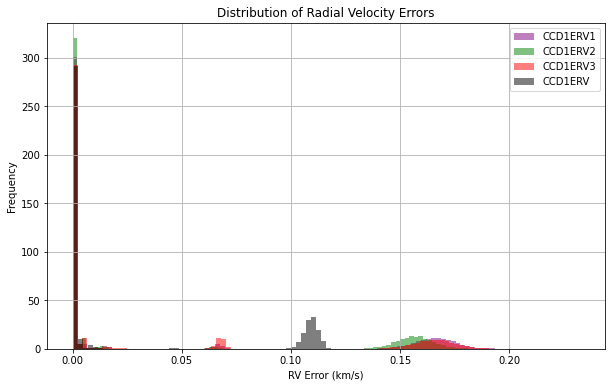

In [67]:
# plot the distributions of radial velocity errors

plot_rv_error_histograms_by_fiber(df_02a)

# observations
# the overall error is less than the error of each fiber (as expected)
# the error distributions are different for the different fibers

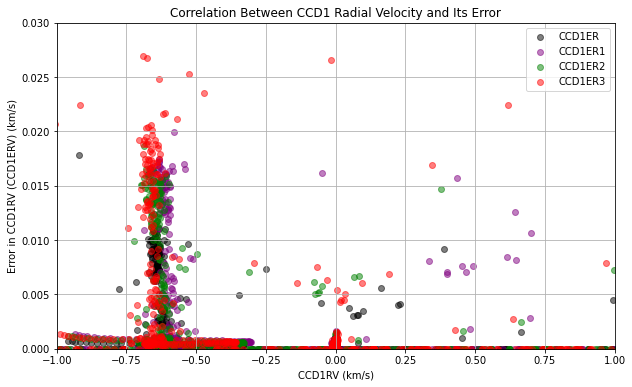

In [68]:
# Scatter plot to explore the correlation between CCD1RV and its error CCD1ERV

plot_rv_error_scatter_by_fiber(df_02a, xmin=-1, xmax=1, ymin=0, ymax=0.03)

# observations
# there is some clustering in the error 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


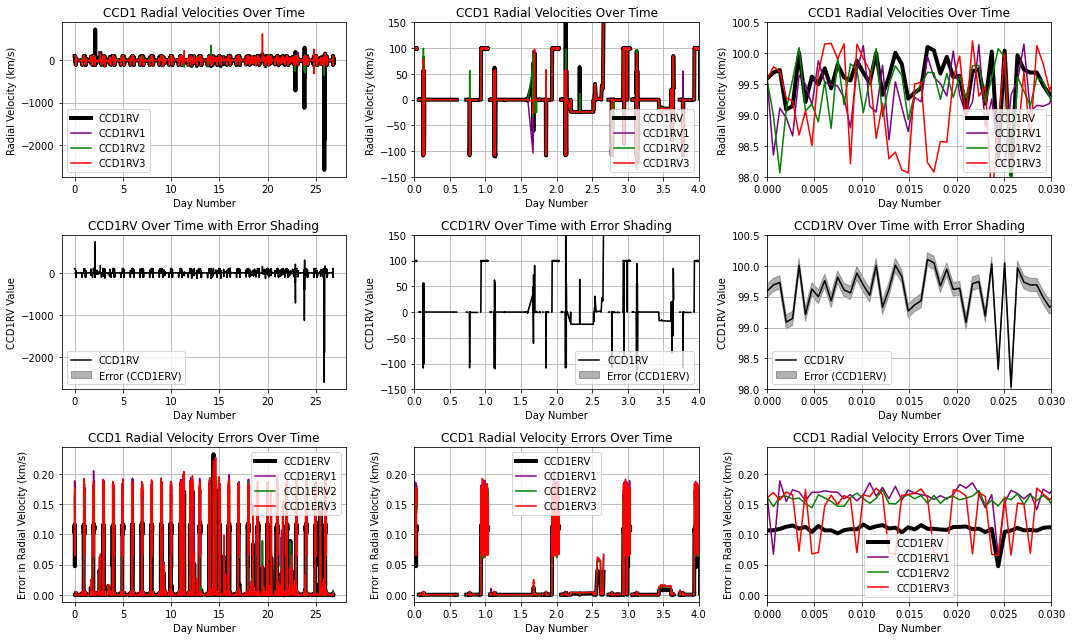

In [69]:
# plot the mean RV value, along with its error, from the Green CCD over time

plot_rv_time_trends_grid(df_02a, 0, 0.03, 98, 100.5)

# observations
# the error in RV varies over time (not a surprise)

# questions
# how is the error itself computed?



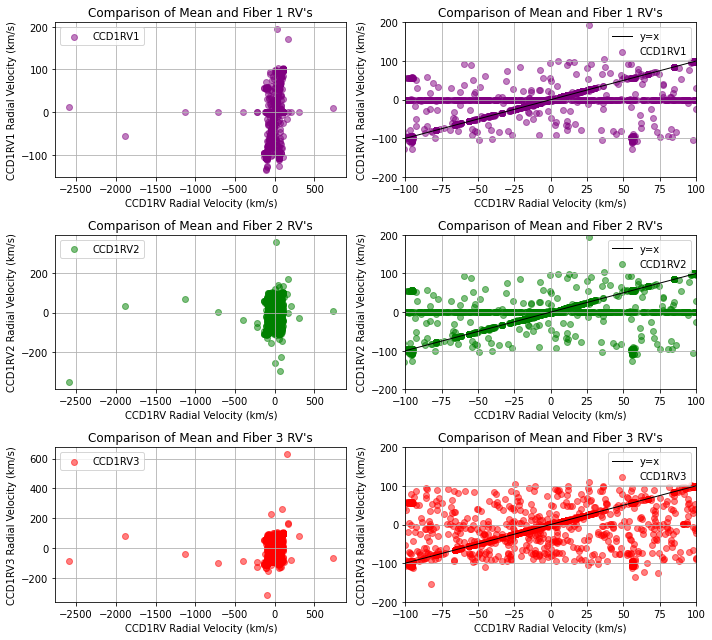

In [70]:
# plot the mean RV against the component RV's
plot_rv_scatter_by_fiber(df_02a)

# observations:
# i'd naively expect a uniform distribution about y=x but we don't see this
# howard mentioned that the error distribution around CCD1RV1=0 arises from the bias

### EDA on Etalon

In [71]:
# pass only objects that are etalon
df_02b= df_02a[df_02a['OBJECT'].str.contains('autocal-etalon')]

# inspect the df
display(df_02b.head())

# display the df structure
print("DataFrame Information:")
display(df_02b.info())

# inspect summary stats
print("\nSummary Statistics:")
display(df_02b.describe())

,ObsID,OBJECT,datecode,CCD1BJD,day_num,CCFRV,CCFERV,CCD1RV1,CCD1ERV1,CCD1RV2,CCD1ERV2,CCD1RV3,CCD1ERV3,CCD1RV,CCD1ERV,CCD1RV_upper,CCD1RV_lower
63,KP.20241001.05482.41,autocal-etalon-all-eve,20241001,2.460585e+06,0.063533,-0.002639,0.000057,-0.004277,0.000179,-0.003368,0.000156,-0.005530,0.000170,-0.004568,0.000097,-0.004472,-0.004665
64,KP.20241001.05590.94,autocal-etalon-all-eve,20241001,2.460585e+06,0.064789,-0.002468,0.000056,-0.004561,0.000177,-0.003345,0.000154,-0.005565,0.000168,-0.004665,0.000096,-0.004570,-0.004761
65,KP.20241001.05699.65,autocal-etalon-all-eve,20241001,2.460585e+06,0.066047,-0.002553,0.000056,-0.004542,0.000177,-0.003263,0.000154,-0.005508,0.000168,-0.004602,0.000096,-0.004507,-0.004698
107,KP.20241001.10301.86,autocal-etalon-all-eve,20241001,2.460585e+06,0.119313,-0.002941,0.000056,-0.004956,0.000176,-0.003977,0.000154,-0.006078,0.000168,-0.005177,0.000095,-0.005082,-0.005273
108,KP.20241001.10410.31,autocal-etalon-all-eve,20241001,2.460585e+06,0.120568,-0.002875,0.000056,-0.004377,0.000176,-0.003792,0.000153,-0.005426,0.000167,-0.004711,0.000095,-0.004616,-0.004806


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2586 entries, 63 to 14865
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ObsID         2586 non-null   object 
 1   OBJECT        2586 non-null   object 
 2   datecode      2586 non-null   object 
 3   CCD1BJD       2584 non-null   float64
 4   day_num       2584 non-null   float64
 5   CCFRV         2584 non-null   float64
 6   CCFERV        2584 non-null   float64
 7   CCD1RV1       2584 non-null   float64
 8   CCD1ERV1      2584 non-null   float64
 9   CCD1RV2       2584 non-null   float64
 10  CCD1ERV2      2584 non-null   float64
 11  CCD1RV3       2584 non-null   float64
 12  CCD1ERV3      2584 non-null   float64
 13  CCD1RV        2584 non-null   float64
 14  CCD1ERV       2584 non-null   float64
 15  CCD1RV_upper  2584 non-null   float64
 16  CCD1RV_lower  2584 non-null   float64
dtypes: float64(14), object(3)
memory usage: 363.7+

None


Summary Statistics:


,CCD1BJD,day_num,CCFRV,CCFERV,CCD1RV1,CCD1ERV1,CCD1RV2,CCD1ERV2,CCD1RV3,CCD1ERV3,CCD1RV,CCD1ERV,CCD1RV_upper,CCD1RV_lower
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,2.460597e+06,12.647015,-0.003969,0.000058,-0.003460,0.000182,-0.005375,0.000158,-0.006886,0.000173,-0.007296,0.000098,-0.007198,-0.007395
std,7.986903e+00,7.986903,0.005836,0.000013,0.095650,0.000027,0.070710,0.000024,0.047984,0.000026,0.062349,0.000015,0.062350,0.062349
min,2.460585e+06,0.063533,-0.155513,0.000000,-0.980834,0.000000,-2.198092,0.000000,-1.681329,0.000000,-2.262916,0.000000,-2.262916,-2.262916
25%,2.460591e+06,6.257751,-0.004517,0.000057,-0.007697,0.000175,-0.006250,0.000153,-0.008636,0.000167,-0.007582,0.000095,-0.007482,-0.007686
50%,2.460596e+06,11.563591,-0.004060,0.000058,-0.006847,0.000180,-0.005724,0.000157,-0.008099,0.000171,-0.007014,0.000097,-0.006915,-0.007113
75%,2.460604e+06,19.270634,-0.003660,0.000060,-0.006231,0.000188,-0.005189,0.000162,-0.007502,0.000178,-0.006544,0.000101,-0.006448,-0.006643
max,2.460611e+06,26.773254,0.155027,0.000307,2.895646,0.000584,1.324264,0.000506,0.912242,0.000555,0.966533,0.000316,0.966533,0.966533


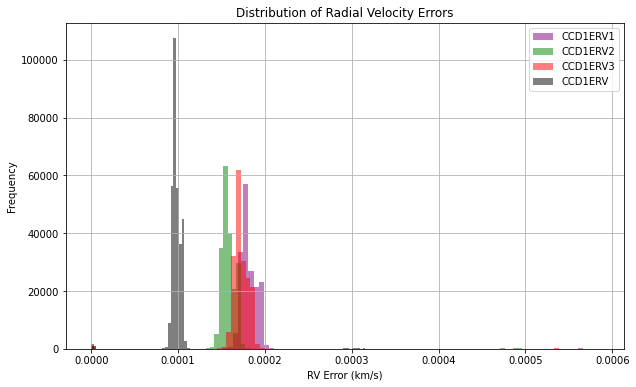

In [72]:
plot_rv_error_histograms_by_fiber(df_02b)

# observations
# the overall error is less than the error of each fiber (as expected)
# the error distributions are different for the different fibers

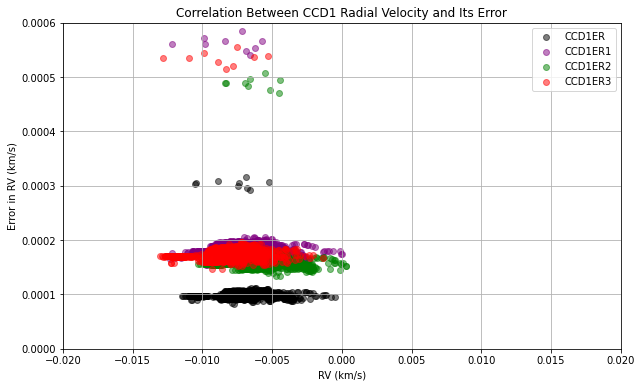

In [84]:
plot_rv_error_scatter_by_fiber(df_02b, xmin=-0.02, xmax=0.02, ymin=-0, ymax=0.0006)

In [89]:
# define a function for outlier identification via interquartile range
def show_rv_outliers(df, series_name):
    # compute IQR for error data to identify potential outliers
    q25, q75 = np.percentile(df[series_name], 25), np.percentile(df[series_name], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    # return the outliers
    outliers = df[(df[series_name] > upper) | (df[series_name] < lower)]
    print(f"{series_name} outliers based on IQR:")
    display(outliers)

show_rv_outliers(df_02b, 'CCD1ERV')
show_rv_outliers(df_02b, 'CCD1ERV1')
show_rv_outliers(df_02b, 'CCD1ERV2')
show_rv_outliers(df_02b, 'CCD1ERV3')

CCD1ERV outliers based on IQR:


,ObsID,OBJECT,datecode,CCD1BJD,day_num,CCFRV,CCFERV,CCD1RV1,CCD1ERV1,CCD1RV2,CCD1ERV2,CCD1RV3,CCD1ERV3,CCD1RV,CCD1ERV,CCD1RV_upper,CCD1RV_lower


CCD1ERV1 outliers based on IQR:


,ObsID,OBJECT,datecode,CCD1BJD,day_num,CCFRV,CCFERV,CCD1RV1,CCD1ERV1,CCD1RV2,CCD1ERV2,CCD1RV3,CCD1ERV3,CCD1RV,CCD1ERV,CCD1RV_upper,CCD1RV_lower


CCD1ERV2 outliers based on IQR:


,ObsID,OBJECT,datecode,CCD1BJD,day_num,CCFRV,CCFERV,CCD1RV1,CCD1ERV1,CCD1RV2,CCD1ERV2,CCD1RV3,CCD1ERV3,CCD1RV,CCD1ERV,CCD1RV_upper,CCD1RV_lower


CCD1ERV3 outliers based on IQR:


,ObsID,OBJECT,datecode,CCD1BJD,day_num,CCFRV,CCFERV,CCD1RV1,CCD1ERV1,CCD1RV2,CCD1ERV2,CCD1RV3,CCD1ERV3,CCD1RV,CCD1ERV,CCD1RV_upper,CCD1RV_lower


In [98]:
from scipy.stats import ttest_ind

# define a function to compare the mean values of the main cluster vs. the high-error cluster
def compare_rv_clusters(df, series_name, error_cutoff, comparison_col):

        main_cluster = df[df_02b[series_name] <= error_cutoff][comparison_col] 
        comparison_cluster = df[df_02b[series_name] > error_cutoff][comparison_col]
        
        #print(len(main_cluster))
        #print(len(comparison_cluster))

        # t-test for comparing the values
        t_stat, p_value = ttest_ind(main_cluster, comparison_cluster, equal_var=False)
        # reminder:  the null hypothesis is that there's no significant difference in the two sets
        
        print(f"\n{series_name} -- {comparison_col}")
        print(f"p-value: {p_value}")
        if p_value < 0.05:
            print(f"\tThere is strong evidence of a significant difference.")
        else:
            print(f"\tThere is not strong evidence of a significant difference.")

compare_rv_clusters(df_02b, 'CCD1ERV', 0.0002, 'CCD1ERV')
compare_rv_clusters(df_02b, 'CCD1ERV1', 0.0002, 'CCD1ERV1')
compare_rv_clusters(df_02b, 'CCD1ERV2', 0.0002, 'CCD1ERV2')
compare_rv_clusters(df_02b, 'CCD1ERV3', 0.0002, 'CCD1ERV3')




CCD1ERV -- CCD1ERV
p-value: 2.040635908530154e-13
	There is strong evidence of a significant difference.

CCD1ERV1 -- CCD1ERV1
p-value: 0.00024761975299468427
	There is strong evidence of a significant difference.

CCD1ERV2 -- CCD1ERV2
p-value: 1.6687268643599099e-13
	There is strong evidence of a significant difference.

CCD1ERV3 -- CCD1ERV3
p-value: 2.4146334419542704e-13
	There is strong evidence of a significant difference.


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


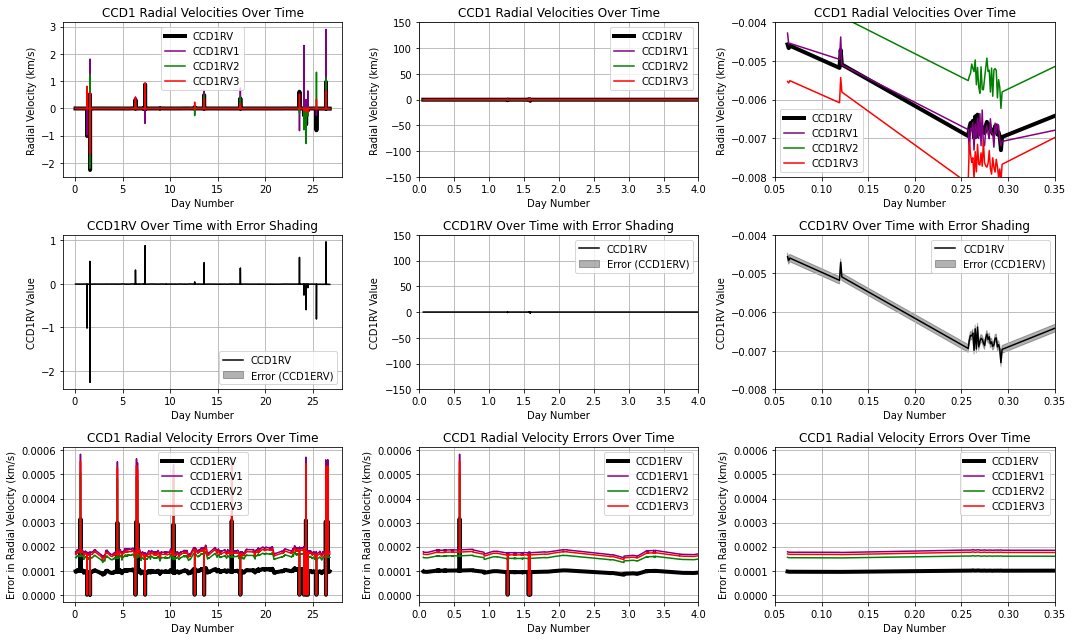

In [74]:
plot_rv_time_trends_grid(df_02b, 0.05, .35, -.008, -0.004)

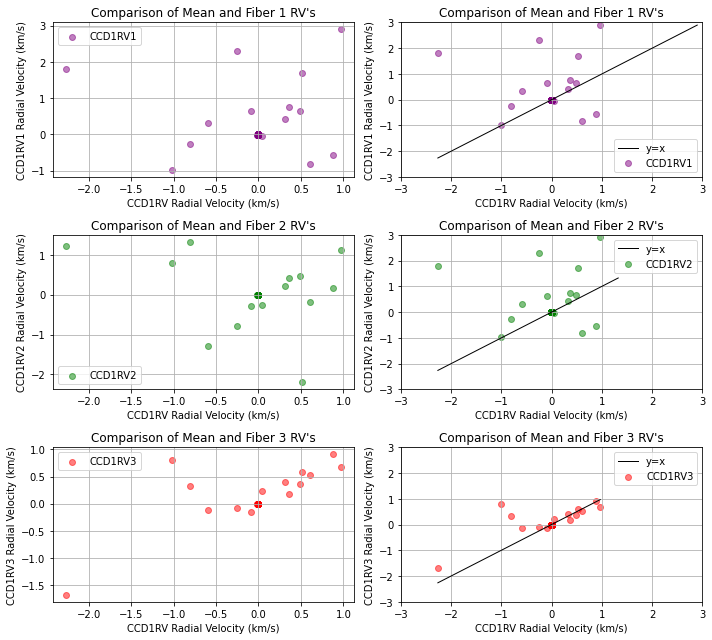

In [75]:
plot_rv_scatter_by_fiber(df_02b, -3,3,-3,3)

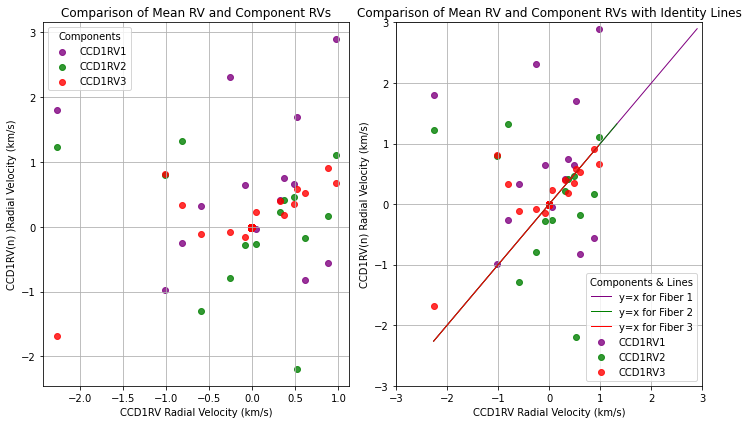

In [76]:
plot_rv_scatter_by_fiber_overlay(df_02b, -3,3,-3,3)

## Interrogating Stars

In [77]:
print(df_02['OBJECT'].unique())

['autocal-flat-all' 'autocal-bias' 'autocal-dark' 'autocal-etalon-all-eve'
 'autocal-thar-sci-eve' 'autocal-thar-sky-eve' 'autocal-thar-cal-eve'
 'autocal-thar-all-eve' 'autocal-thar-hk' 'flush-persistence'
 'autocal-une-sci-eve' 'autocal-une-sky-eve' 'autocal-une-cal-eve'
 'autocal-une-all-eve' 'autocal-lfc-all-eve' 'autocal-etalon-all-night'
 'autocal-lfc-all-midnight' 'autocal-etalon-all-morn'
 'autocal-thar-all-morn' 'autocal-une-all-morn' 'autocal-lfc-all-morn'
 'SoCal' 'slewcal' '166620' 'TOI-1386' '219134' '4614' '13931' 'K2-155'
 'ZTF19abymxrr' 'KH15D' '32147' 'TEEGARDEN' 'TOI-852' '19994' 'TOI-4363'
 '34445' 'TOI-2470' '31253' '37008' '55575' '52711' '185144' '145675'
 '142373' 'TIC198162530' 'TIC321669174' 'KIC4736208' 'KOI-8159'
 'Kepler-172' 'Kepler-65' 'Kepler-100' 'KOI-7673' 'KIC7847927'
 'Kepler-142' '7449' '201092' '201091' '217107' 'K2-58' 'HIP116061'
 'HIP115594' 'WASP-173B' '24040' '11506' '10700' 'ADS16402A' 'Kepler-1517'
 'TOI-1630' '210277' '4628' 'KOI-4005' 'TOI-

## Provisional

In [82]:
# pass only objects that are etalon
df_02c= df_02[df_02a['OBJECT'].str.contains('autocal-etalon')]

# inspect the df
display(df_02c.head())

# display the df structure
print("DataFrame Information:")
display(df_02c.info())

# inspect summary stats
print("\nSummary Statistics:")
display(df_02c.describe())

,ObsID,OBJECT,datecode,CCD1BJD,day_num,CCFRV,CCFERV,CCD1RV,CCD1ERV,CCD1RV1,...,FFFB,EXPMETER,CAL-OBJ,SKY-OBJ,SCI-OBJ,ETAV1C1T,ETAV1C2T,ETAV1C3T,ETAV1C4T,ETAV2C3T
63,KP.20241001.05482.41,autocal-etalon-all-eve,20241001,2.460585e+06,0.063533,-0.002639,0.000057,-0.004568,0.000097,-0.004277,...,No,NO,EtalonFiber,EtalonFiber,EtalonFiber,23.993279,23.791512,23.599953,23.900040,24.000051
64,KP.20241001.05590.94,autocal-etalon-all-eve,20241001,2.460585e+06,0.064789,-0.002468,0.000056,-0.004665,0.000096,-0.004561,...,No,NO,EtalonFiber,EtalonFiber,EtalonFiber,23.990154,23.791985,23.600050,23.900007,24.001251
65,KP.20241001.05699.65,autocal-etalon-all-eve,20241001,2.460585e+06,0.066047,-0.002553,0.000056,-0.004602,0.000096,-0.004542,...,No,NO,EtalonFiber,EtalonFiber,EtalonFiber,23.990154,23.791571,23.599949,23.899971,24.000341
107,KP.20241001.10301.86,autocal-etalon-all-eve,20241001,2.460585e+06,0.119313,-0.002941,0.000056,-0.005177,0.000095,-0.004956,...,No,NO,EtalonFiber,EtalonFiber,EtalonFiber,23.990154,23.791899,23.599993,23.899965,23.998665
108,KP.20241001.10410.31,autocal-etalon-all-eve,20241001,2.460585e+06,0.120568,-0.002875,0.000056,-0.004711,0.000095,-0.004377,...,No,NO,EtalonFiber,EtalonFiber,EtalonFiber,23.993279,23.791985,23.600063,23.899933,24.000952


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2586 entries, 63 to 14865
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ObsID     2586 non-null   object 
 1   OBJECT    2586 non-null   object 
 2   datecode  2586 non-null   object 
 3   CCD1BJD   2584 non-null   float64
 4   day_num   2584 non-null   float64
 5   CCFRV     2584 non-null   float64
 6   CCFERV    2584 non-null   float64
 7   CCD1RV    2584 non-null   float64
 8   CCD1ERV   2584 non-null   float64
 9   CCD1RV1   2584 non-null   float64
 10  CCD1ERV1  2584 non-null   float64
 11  CCD1RV2   2584 non-null   float64
 12  CCD1ERV2  2584 non-null   float64
 13  CCD1RV3   2584 non-null   float64
 14  CCD1ERV3  2584 non-null   float64
 15  ELAPSED   2586 non-null   float64
 16  FRAMENO   2586 non-null   int64  
 17  PROGNAME  2586 non-null   object 
 18  HA        2586 non-null   object 
 19  EL        2586 non-null   float64
 20  AZ   

None


Summary Statistics:


,CCD1BJD,day_num,CCFRV,CCFERV,CCD1RV,CCD1ERV,CCD1RV1,CCD1ERV1,CCD1RV2,CCD1ERV2,...,ELAPSED,FRAMENO,EL,AZ,AIRMASS,ETAV1C1T,ETAV1C2T,ETAV1C3T,ETAV1C4T,ETAV2C3T
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,...,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000,2586.000000
mean,2.460597e+06,12.647015,-0.003969,0.000058,-0.007296,0.000098,-0.003460,0.000182,-0.005375,0.000158,...,59.514073,311758.062645,46.551686,91.426651,3.359084,23.990011,23.790011,23.600001,23.899998,24.000005
std,7.986903e+00,7.986903,0.005836,0.000013,0.062349,0.000015,0.095650,0.000027,0.070710,0.000024,...,5.166458,4464.304076,25.271733,120.537658,4.541962,0.001453,0.001026,0.000048,0.000068,0.000922
min,2.460585e+06,0.063533,-0.155513,0.000000,-2.262916,0.000000,-0.980834,0.000000,-2.198092,0.000000,...,6.000000,304787.000000,0.000000,-113.000000,1.000000,23.987028,23.787609,23.599865,23.899822,23.996675
25%,2.460591e+06,6.257751,-0.004517,0.000057,-0.007582,0.000095,-0.007697,0.000175,-0.006250,0.000153,...,60.000000,308214.250000,36.162500,-20.000000,1.090000,23.988590,23.789433,23.599964,23.899944,23.999614
50%,2.460596e+06,11.563591,-0.004060,0.000058,-0.007014,0.000097,-0.006847,0.000180,-0.005724,0.000157,...,60.001000,311060.500000,50.065000,79.315000,1.300000,23.990154,23.789905,23.599998,23.899992,24.000024
75%,2.460604e+06,19.270634,-0.003660,0.000060,-0.006544,0.000101,-0.006231,0.000188,-0.005189,0.000162,...,60.022000,315516.750000,67.000000,193.492500,1.690000,23.990154,23.790428,23.600035,23.900051,24.000711
max,2.460611e+06,26.773254,0.155027,0.000307,0.966533,0.000316,2.895646,0.000584,1.324264,0.000506,...,60.140000,319588.000000,90.000000,314.960000,13.370000,23.993279,23.792646,23.600166,23.900194,24.001978


In [100]:
compare_rv_clusters(df_02c, 'CCD1ERV', 0.0002, 'ETAV1C1T')
compare_rv_clusters(df_02c, 'CCD1ERV1', 0.0002, 'ETAV1C1T')
compare_rv_clusters(df_02c, 'CCD1ERV2', 0.0002, 'ETAV1C1T')
compare_rv_clusters(df_02c, 'CCD1ERV3', 0.0002, 'ETAV1C1T')


CCD1ERV -- ETAV1C1T
p-value: 0.23714224454938357
	There is not strong evidence of a significant difference.

CCD1ERV1 -- ETAV1C1T
p-value: 0.5894077379843203
	There is not strong evidence of a significant difference.

CCD1ERV2 -- ETAV1C1T
p-value: 0.23714224454938357
	There is not strong evidence of a significant difference.

CCD1ERV3 -- ETAV1C1T
p-value: 0.23714224454938357
	There is not strong evidence of a significant difference.
